### Non-linear Models
##### Adapted by Dr. Harry Goldingay from solution by Miss Katrina Jones and Dr. Aniko Ekart (ML Module, 2021)

_Note: this task operates on the same dataset as the task from the previous week, so I will import much of the code from that task's solution. The code which is unique to this week's task starts after the "Task 1" heading below._ 

In [1]:
# Import general modules
import pandas as pd # For reading the csv
from sklearn.linear_model import Perceptron # Our chosen model
from sklearn.metrics import confusion_matrix # For creation of the confusion matrix
from sklearn.metrics import classification_report # For creation of precision, recall and f1-measures
from sklearn.metrics import accuracy_score # For help in comparing data given using accuracy score vs confusion matrix
import matplotlib.pyplot as plt

_Setting up and reading the database from the csv file._

In [2]:
#Use header=None to avoid the first row being used as column headers
df = pd.read_csv("haberman.csv",header=None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


_We can add textual column headers for readability_

In [3]:
df.columns = ['age','operationYear','positiveAuxNodes','survivalStatus']
df.head()

,age,operationYear,positiveAuxNodes,survivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.describe() # Useful in this context due to us having so much data - we can see the range of the values in each columns...

,age,operationYear,positiveAuxNodes,survivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Pre-Processing the Data: Grouping the data using the Year of Operation for the train-test split criteria
_We were asked to split the data so that there were 229 rows for the train set using the years 1958-1965, and 77 rows for the test data, using the years 1966-1969._

In [5]:
# Let's get the train set - so the data that resides between 1958-1965 (229 rows)
df_train = df.loc[(df['operationYear'] <= 65) & (df['operationYear'] >= 58)] # I chose to use split using boolean_indexing, but Pandas groupby is a good alternative
df_train.shape

(229, 4)

In [6]:
# Let's get the test set - so the data that resides above 1965 (77 rows)
df_test = df.loc[(df['operationYear'] <= 69) & (df['operationYear'] >= 66)] # I chose to use split using boolean_indexing, but Pandas groupby is a good alternative
df_test.shape

(77, 4)

#### Creating the Train and Test datasets
_Divide the dataset into training and testing sets, by using the data for years. 1958-1965 (229 instances) for training and 1966-1969 (77 instances) for testing. Now that we have split the data in such a way, we can do this simply:_

In [7]:
# Our train set...
# We will extract the independent (X) and dependent (y) variables with iloc as we have seen previously.
X_train = df_train.iloc[:,0:3]
y_train = df_train.iloc[:,3]

# Our test set...
# We will extract the independent and dependent variables by header name here, just to see how it is
# done. You should pick one method and stick to it!
X_test = df_test[['age','operationYear','positiveAuxNodes']]
y_test = df_test['survivalStatus']

_We have been asked to run some experiments. Let's write some helper functions to make our lives easier!_

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# We are creating two helper functions, both of which will need to predict class labels.
# Factor the code into one function rather than duplicating it.
def predict_class_labels(classifier,X_train,y_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = classifier.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    #print(classifier.coef_)
    
    return y_pred

#This function will display the full results (confusion matrix, classification report)
def display_model_results_full(title,classifier,X_train,y_train,X_test,y_test):
    print(title + '. Full results')

    y_pred = predict_class_labels(classifier,X_train,y_train,X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=classifier.classes_).plot()
    plt.show() # Add to print the confusion matrix before the next line
    
    print(classification_report(y_test, y_pred))
    print('\n')

#This function will display selected scores (f1-score macro average, accuracy)
def display_model_results_brief(title,classifier,X_train,y_train,X_test,y_test):
    print(title + '. Brief results')
    
    y_pred = predict_class_labels(classifier,X_train,y_train,X_test)
    
    print('f1 score: {}'.format(f1_score(y_test,y_pred,average='macro')))
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)))
    print('\n')

### Task 1

_We were asked to find a plausible number of nodes for an MLPClassifier. In task 1, we will just use trial and error. We will see a more systematic method when looking at task 3._

In [9]:
from sklearn.neural_network import MLPClassifier
#Let's try a range of hidden layer sizes.
for i in range(10,101,10):
    display_model_results_brief(
        '{} nodes in hidden layer'.format(i),
        MLPClassifier(hidden_layer_sizes=(i),max_iter=1000,random_state=42),
        X_train,y_train,X_test,y_test)

10 nodes in hidden layer. Brief results
f1 score: 0.5064102564102564
accuracy: 0.7402597402597403


20 nodes in hidden layer. Brief results
f1 score: 0.6264726264726265
accuracy: 0.7272727272727273


30 nodes in hidden layer. Brief results
f1 score: 0.6163126147390505
accuracy: 0.7532467532467533


40 nodes in hidden layer. Brief results
f1 score: 0.5722222222222223
accuracy: 0.6103896103896104


50 nodes in hidden layer. Brief results
f1 score: 0.5298132183908046
accuracy: 0.5584415584415584


60 nodes in hidden layer. Brief results
f1 score: 0.37567567567567567
accuracy: 0.37662337662337664


70 nodes in hidden layer. Brief results
f1 score: 0.6394648829431437
accuracy: 0.7272727272727273


80 nodes in hidden layer. Brief results
f1 score: 0.5191793041926851
accuracy: 0.5454545454545454


90 nodes in hidden layer. Brief results
f1 score: 0.6285087719298246
accuracy: 0.7142857142857143


100 nodes in hidden layer. Brief results
f1 score: 0.6612193588937775
accuracy: 0.7272727272727273

In [10]:
#We saw f1-score peaking at around 30 hidden nodes. Let's look around that value more specifically.
for i in range(21,40):
    display_model_results_brief(
        '{} nodes in hidden layer'.format(i),
        MLPClassifier(hidden_layer_sizes=(i),max_iter=1000,random_state=42),
        X_train,y_train,X_test,y_test)

21 nodes in hidden layer. Brief results
f1 score: 0.6055327868852459
accuracy: 0.7402597402597403


22 nodes in hidden layer. Brief results
f1 score: 0.5372596153846154
accuracy: 0.7402597402597403


23 nodes in hidden layer. Brief results
f1 score: 0.5372596153846154
accuracy: 0.7402597402597403


24 nodes in hidden layer. Brief results
f1 score: 0.5964137931034483
accuracy: 0.7532467532467533


25 nodes in hidden layer. Brief results
f1 score: 0.5860215053763441
accuracy: 0.7402597402597403


26 nodes in hidden layer. Brief results
f1 score: 0.6051282051282052
accuracy: 0.7012987012987013


27 nodes in hidden layer. Brief results
f1 score: 0.6487394957983194
accuracy: 0.7532467532467533


28 nodes in hidden layer. Brief results
f1 score: 0.5722222222222223
accuracy: 0.6103896103896104


29 nodes in hidden layer. Brief results
f1 score: 0.42065663474692205
accuracy: 0.42857142857142855


30 nodes in hidden layer. Brief results
f1 score: 0.6163126147390505
accuracy: 0.7532467532467533


34 nodes in hidden layer. Full results


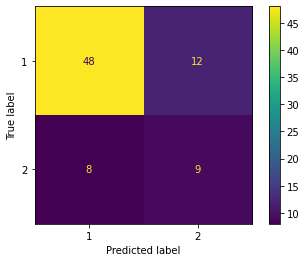

              precision    recall  f1-score   support

           1       0.86      0.80      0.83        60
           2       0.43      0.53      0.47        17

    accuracy                           0.74        77
   macro avg       0.64      0.66      0.65        77
weighted avg       0.76      0.74      0.75        77





In [11]:
#Best score observed with 32 nodes in the hidden layer. Let's look at the result in more detail.
display_model_results_full(
    '34 nodes in hidden layer',
    MLPClassifier(hidden_layer_sizes=(32),max_iter=1000,random_state=42),
    X_train,y_train,X_test,y_test)

34 nodes in hidden layer. Full results


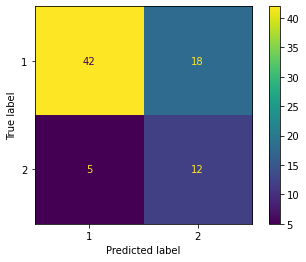

              precision    recall  f1-score   support

           1       0.89      0.70      0.79        60
           2       0.40      0.71      0.51        17

    accuracy                           0.70        77
   macro avg       0.65      0.70      0.65        77
weighted avg       0.78      0.70      0.72        77





In [12]:
#As an aside, what happens if we change the random state?
display_model_results_full(
    '34 nodes in hidden layer',
    MLPClassifier(hidden_layer_sizes=(32),max_iter=1000,random_state=43),
    X_train,y_train,X_test,y_test)

### Task 3

In [13]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]

import numpy as np
from sklearn.model_selection import cross_val_score

# This function returns average accuracy after k-fold cross validation.
def calculate_kfold_model_results(classifier,n_splits,X,y):
    cv_scores = cross_val_score(
        estimator=classifier,
        X=X,
        y=y,
        scoring='accuracy',
        cv=n_splits
    )
    return np.mean(cv_scores)

_Our textual results were sometimes hard to interpret. It would be easier to follow if our results were in a graph. Let's plot a graph for this example._ 

Text(0, 0.5, 'accuracy')

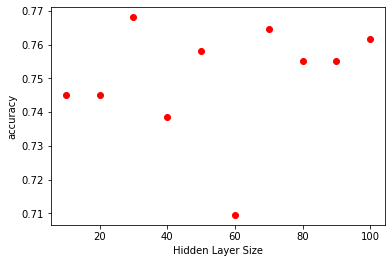

In [14]:
import matplotlib.pyplot as plt

#accuracy = []
#for i in range(10,101,10):
#    acc = calculate_kfold_model_results(
#        MLPClassifier(hidden_layer_sizes=(i),max_iter=1000,random_state=42),
#        5,X,y)
#    accuracy.append(acc)

# More pythonic way to the same as above
accuracy = [
    calculate_kfold_model_results(MLPClassifier(hidden_layer_sizes=(i),max_iter=1000,random_state=42),5,X,y)
    for i in range(10,101,10)
]

plt.scatter(range(10,101,10), accuracy,color='red')
plt.xlabel('Hidden Layer Size')
plt.ylabel('accuracy')

#### Task 3 Extension: Pipelines
_In task 1, we were scaling the data before calculating its performance. When using cross-val score, there is no obvious place to scale the data, which can be very important depending on your model. We can scale the data within cross validation by defining a *pipeline*. This is a more advanced concept and not core to the module, but you may find it useful._

In [15]:
from sklearn.pipeline import Pipeline

# This function returns average accuracy after k-fold cross validation.
def calculate_kfold_model_scaled_results(classifier,n_splits,X,y):
    scaler = StandardScaler()
    pipeline = Pipeline([('transformer', scaler),('estimator',classifier)])

    cv_scores = cross_val_score(
        pipeline,
        X=X,
        y=y,
        scoring='accuracy',
        cv=n_splits
    )
    return np.mean(cv_scores)

Text(0, 0.5, 'accuracy')

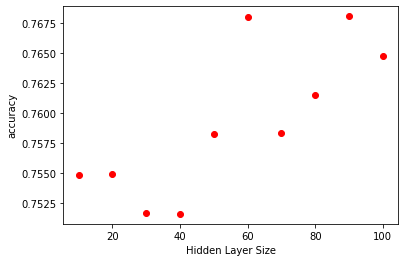

In [16]:
accuracy = [
    calculate_kfold_model_scaled_results(MLPClassifier(hidden_layer_sizes=(i),max_iter=1000,random_state=42),5,X,y)
    for i in range(10,101,10)
]

plt.scatter(range(10,101,10), accuracy,color='red')
plt.xlabel('Hidden Layer Size')
plt.ylabel('accuracy')